<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

*Author: Alexander Del Toro Barba*

## Summary

**Key Points**
* The activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.
* Activation functions reside within neurons and transform input values into acceptable and useful range. They can introduce non-linearity to a network.
* There are various kinds of activation functions and it has been found, empirically, that some of them works better for large datasets or particular problems than the others. 
* Neural networks extract hidden pattern from a dataset by observing given examples of known answers. Evidently, it does so by comparing its predictions to the ground truth (labeled images for example) and turning the parameters of the model. The difference between the prediction and the ground truth is called the ‘classification error’.
* Parameters of a DL model consists of a set of weights connecting neurons across layers and bias terms which add to those layers. So, the ultimate goal is to set those weights to specific values which reduces the overall classification error. This is a minimization operation, and consequently, an optimization technique is needed.
* The overall representation structure of a deep learning model is a highly complex nonlinear function and therefore, the optimizer is responsible for minimizing the error produced by the evaluation of this complex function. Therefore, standard optimization like linear programming does not work for DL models and innovative nonlinear optimization must be used.
* These two components – **activation functions** and **nonlinear optimizers** – are at the core of every deep learning architecture. However, there is considerable variety in the specifics of these components.



[Activation Function](https://raw.githubusercontent.com/deltorobarba/repo/master/8CF488DE-A705-4586-A2BF-627A361EA2CE.png)

# Activation Functions

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_3.png)

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_1.png)

Source: [Stanford.edu](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning)

In [3]:
# Populating the interactive namespace from numpy and matplotlib
%pylab inline

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})

Populating the interactive namespace from numpy and matplotlib


## Binary Step

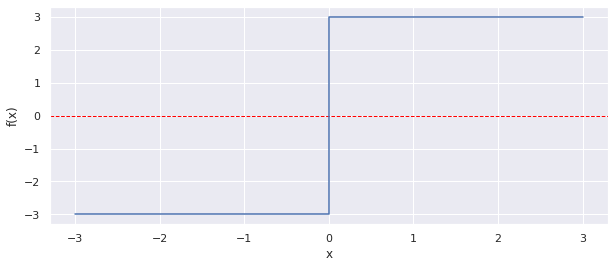

In [0]:
x = [-3, -2, -1, 0, 1, 2, 3]
y = [-3, -3, -3, -3, 3, 3, 3]
# y = [2, 2, 2, 2, 2.9, 2.9, 2.9]
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.step(x, y)

## tanh (hyperbolic tangent)

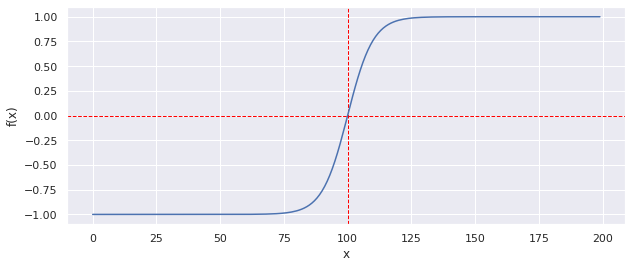

In [0]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=100, color='red', linestyle='--', linewidth=1.0);
plt.plot(np.tanh(x))

$g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

* LeCun et al., 1991
* Squashes numbers to range [-1,1]
* zero centered (nice)
* The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
* The function is differentiable.
* The function is monotonic while its derivative is not monotonic.
* The tanh function is mainly used classification between two classes.
* still kills gradients when saturated




## Sigmoid (Logistic Regression)

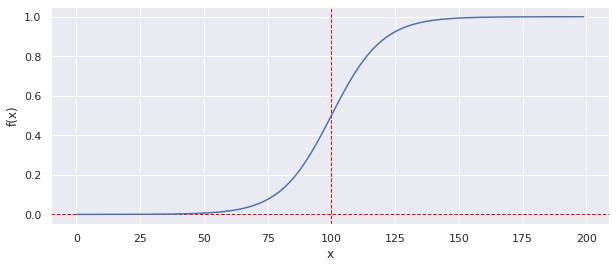

In [5]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=100, color='red', linestyle='--', linewidth=1.0);
plt.plot(1 / (1 + np.exp(-x)))

**Formula**

$g(z)=\frac{1}{1+e^{-z}}$

<br> 
**Characteristics**
* Logistic regression. Takes a real-valued number as an input and compresses all its outputs to the range of [0,1]. Sigmoid only for binary classification output layer.
* Sigmoid activation derived from mean field solution of Boltzmann machine
* Softmax function is a more generalized logistic activation function which is used for multiclass classification.

**Advantages**
* In the logistic function, a small change in the input only causes a small change in the output as opposed to the stepped output. Hence, the output is smoother than the step function output.
* Historically popular since they have nice interpretation as a saturating “firing rate” of a neuron.
* The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
* Especially used for models where we have to predict the probability as an output (of a binary problem).
* Sigmoid works well for a classifier: approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence

**Disadvantages**
* exp() is a bit compute expensive. Learning time longer. Also other functions have been shown to produce the same performance with less iterations. Additionally: small local gradients can mute the gradient and disallow the forward propagation of a useful signal.
* The sigmoid function is monotonic but function’s derivative is not: the tails of the first derivative of a Sigmoid are near zero (covariate shift), which lead to vanishing or exploding gradient. Incorrect weight initialization can lead to saturation, where most neurons of the network then become saturated and almost no learning will take place. Saturated neurons “kill” the gradients (look at x= -10, 0 and 10). Can cause the neural network to get stuck during training. If a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks usethe feed-forward activations to calculate parameter gradients, this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state (this problem can be solved if we normalize the data in advance to be zero-centered as in batch/layer normalization).
* Sigmoid outputs are not zero-centered. Neurons in later layers of processing in a neural net would be receiving data that is not zero-centered. If data coming into is always positive, the gradient on the weights 𝑤 will during backpropagation become either all be positive, or all negative. This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. (However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem.)

*Example: there are two parameter w1 and w 2; f the gradients of two dimensions are always of the same sign, it means we can only move roughly in the direction of northeast or southwest in the parameter space. If our goal happens to be in the northeast, we can only move in a zig-zagging fashion to get there, just like parallel parking in a narrow space.*

[Zig Zag Sigmoid](https://raw.githubusercontent.com/deltorobarba/repo/master/3187FEA4-9AAB-4616-9B56-069F057D1669.jpeg)

## ReLU (Rectified Linear Unit)

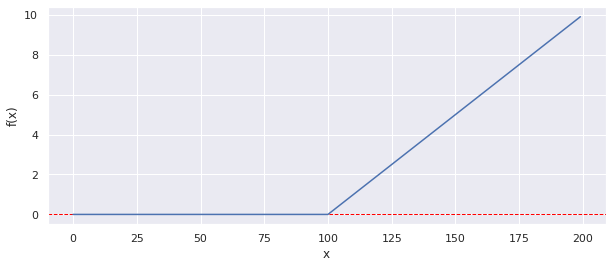

In [0]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.plot(np.maximum(0, x))

$g(z)=\max (0, z)$

<br>

**Characteristics**
* Krizhevsky et al., 2012
* rectified linear units, faster and more efficient, since fewer neurons are activated (less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations). 
* No gradient vanishing problem, as Relu’s gradient is constant = 1. Sparsity: since output 0 for negative values of x! When W*x < 0, Relu gives 0, which means sparsity. Less calculation load. This may be least important. 
* However, ReLu may amplify the signal inside the network more than softmax and sigmoid. 
* But: dying ReLU problem for values zero and smaller: neurons will never reactivated. Solution: leaky ReLU, noisy ReLU (in RBMs) and ELU (exponential linear units)
* ReLU as the activation function for hidden layers and sigmoid for the output layer (these are standards, didn’t experiment much on changing these). Also, I used the standard categorical cross-entropy loss.

**Advantages**
* Does not saturate (in +region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
Actually more biologically plausible than sigmoid

**Disadvantages**
* Not zero-centered output
* An annoyance: what is the gradient when x < 0? What happens when x = -10, 0 or 10?
* People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)



## Leaky ReLU

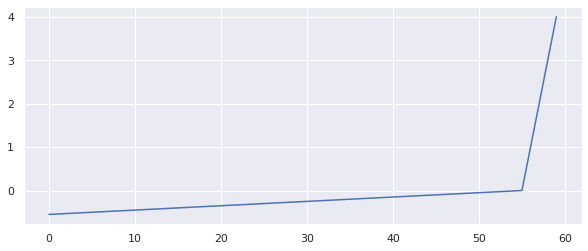

In [0]:
z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

$\begin{aligned}
g(z) &=\max (\epsilon z, z) \\
& \text { with } \epsilon \ll 1
\end{aligned}$

* Mass et al., 2013 and He et al., 2015
* Does not saturate
* Computationally efficient
* Converges much faster than sigmoid/tanh in practice! (e.g. 6x) will not “die”.


## ELU

* Exponential Linear Units
* Clevert et al., 2015
* All benefits of ReLU
* Closer to zero mean outputs
* Negative saturation regime compared with Leaky ReLU adds some robustness to noise 
* But Computation requires exp()


## SELU

* scaled exponential linear units
* instead of normalizing the output of the activation function — the activation function suggested (SELU — scaled exponential linear units) outputs normalized values. https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9
* Background: batchnormalization for feedfirward networks: Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (https://arxiv.org/abs/1502.03167)
* Negative values sometimes: Scaling the function is the mechanism by which the authors accomplish the goal (of self-normalizing properties). As a byproduct, they sometimes output negative values, but there's no hidden meaning in it. It just makes the math work out. 
* **SELU vs RELU**: https://www.hardikp.com/2017/07/24/SELU-vs-RELU/

## Softmax

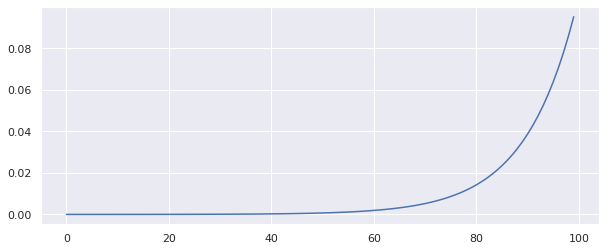

In [0]:
x = np.arange(-5, 5, 0.1)
plt.plot(np.exp(x) / np.sum(np.exp(x)))

* is an activation function that is not function of a single fold x from the previous layer or layers.
* usually used in the last layer
* Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression) 
* is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). We use the (standard) Logistic Regression model in binary classification tasks. in softmax regression (SMR), we replace the sigmoid logistic function by the so-called€softmax function€φ

# RNN Model

## Import & Prepare Data

In [0]:
import tensorflow as tf
import datetime, os

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Select Activation Function

activation function als Dense parameter. Activation layer als eigener layer.

keras.activation = functions

keras.layers = layers

**tanh**

In [0]:
activation = tf.keras.activations.tanh

**Sigmoid**

In [0]:
activation = tf.keras.activations.sigmoid

**ReLU**

In [0]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

**Leaky ReLU**

In [0]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

**Softmax**

In [0]:
activation = tf.keras.layers.Softmax(axis=-1)

**Alternatively Add Default Settings**

In [0]:
activation = 'relu'
# activation = 'linear'
# activation = 'sigmoid'
# activation = 'tanh'
# activation = 'softmax'

## Build Model & Run

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=activation))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5163 - acc: 0.8140 - val_loss: 0.4457 - val_acc: 0.8403
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4215 - acc: 0.8470 - val_loss: 0.4271 - val_acc: 0.8445
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3867 - acc: 0.8589 - val_loss: 0.4087 - val_acc: 0.8537
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3668 - acc: 0.8666 - val_loss: 0.4028 - val_acc: 0.8543
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3519 - acc: 0.8710 - val_loss: 0.3739 - val_acc: 0.8629
